<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_20_2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

In [ ]:
!pwd

/content/yolov5


In [ ]:
#%cd ..

/content


In [ ]:
#!pwd

/content


In [ ]:
#%cd

/root


In [ ]:
#%cd content

[Errno 2] No such file or directory: 'content'
/content/yolov5


mp4 file from Gogle Drive

In [ ]:
#!!gdown --id 1OC2podqojyTRLxIvrMpzM2-gMDP5Elss

In [ ]:
#!!gdown --id 1MY3xACdnewNC7XC566V8TUzHAs2df3eg

In [ ]:
#%cd yolov5

In [ ]:
!python detect.py --source ../elephant2.png

detect: weights=yolov5s.pt, source=../elephant2.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-23-ga18b0c3 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

100% 14.0M/14.0M [00:00<00:00, 21.6MB/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/elephant2.png: 384x640 2 elephants, Done. (0.032s)
Speed: 0.8ms pre-process, 31.7ms inference, 12.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
#!python detect.py --source ../20201009.mp4

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source ../elephant2.png

detect: weights=['yolov5s.pt'], source=../elephant2.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-23-ga18b0c3 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/elephant2.png: 384x640 2 elephants, Done. (0.030s)
Speed: 0.5ms pre-process, 29.8ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


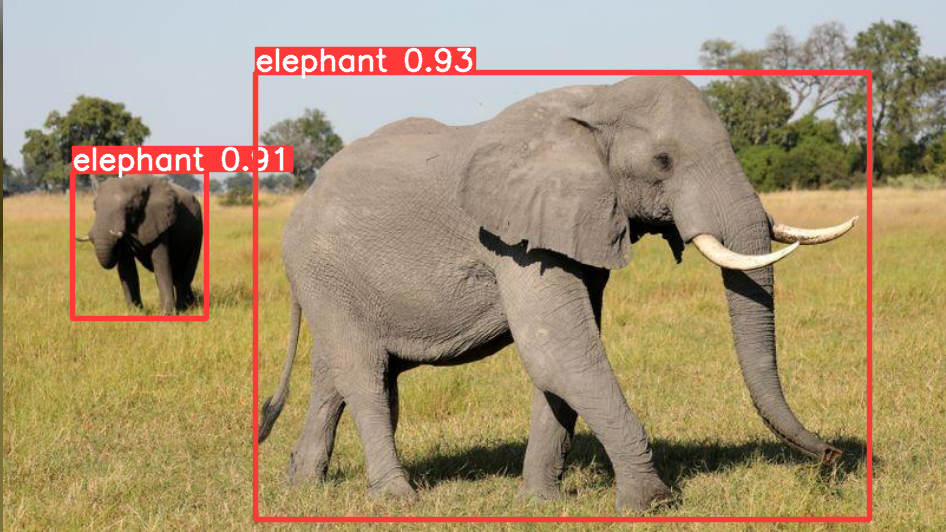

In [ ]:
Image(filename='runs/detect/exp3/elephant2.png', width=600)

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 2. Test
Test a model on [COCO](https://cocodataset.org/#home) val or test-dev dataset to evaluate trained accuracy. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val2017
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
# Run YOLOv5x on COCO val2017
!python detect.py --weights yolov5x.pt --data ./data/coco.yaml --img 640 --iou 0.65

## COCO test-dev2017
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (20,000 images). Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip  # unzip labels
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
%mv ./test2017 ./coco/images && mv ./coco ../  # move images to /coco and move /coco next to /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 using --task test
!python test.py --weights yolov5s.pt --data coco.yaml --task test

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download COCO128
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

Train a YOLOv5s model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --nosave --cache

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

> <img src="https://user-images.githubusercontent.com/26833433/83667642-90fcb200-a583-11ea-8fa3-338bbf7da194.jpeg" width="750">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/83667626-8c37fe00-a583-11ea-997b-0923fe59b29b.jpeg" width="750">  
`test_batch0_labels.jpg` shows test batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/83667635-90641b80-a583-11ea-8075-606316cebb9c.jpeg" width="750">  
`test_batch0_pred.jpg` shows test batch 0 _predictions_


Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

<img src="https://user-images.githubusercontent.com/26833433/97808309-8182b180-1c66-11eb-8461-bffe1a79511d.png" width="800">


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([test.py](https://github.com/ultralytics/yolov5/blob/master/test.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/models/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Reproduce
%%shell
for x in yolov5s yolov5m yolov5l yolov5x; do
  python test.py --weights $x.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  python test.py --weights $x.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP
done

In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile 

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
profile(x=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}